In [18]:
from pathlib import Path
import joblib
import pandas as pd
from loguru import logger
from scripts.evaluate import plot_shap, compute_shapley_values, get_main_features
import matplotlib.pyplot as pp

In [19]:
project_path = Path.cwd().parent

In [20]:
# Reloading the optimzied and trained model
optimized_model = joblib.load(project_path / "models/optimized_trained_model.pkl")
logger.info("Model loaded successfully.")

2025-03-21 12:02:57.701 | INFO     | __main__:<module>:3 - Model loaded successfully.


In [21]:
# Load the test set
dX_test = pd.read_parquet(project_path / "models" / "dX_test.pqt")
dY_test = pd.read_parquet(project_path / "models" / "dY_test.pqt")


In [22]:
model_nums = {k:i for i, k in enumerate(dY_test.columns)}
model_nums

{'dia': 0, 'chl': 1, 'cya': 2, 'coc': 3, 'din': 4, 'pha': 5, 'tot_cphyl': 6}

In [23]:
full_names = {
    'dia': 'Diatom', 'chl': 'Chlorophyte', 'cya': 'Cyanobacteria',
    'coc': 'Coccolithophore', 'din': 'Dinoflagellate',
    'pha': 'Phaeocystis', 'tot_cphyl': 'Total Chlorophyll' }

In [16]:
dX_test_subsampled = dX_test.sample(1000, random_state=42)

In [17]:
def compute_and_plot_shaps(
        target, model_num, show_n_features=-1, xlabel=None, title=None):
    model = optimized_model.estimators_[model_num]
    shap_vals = compute_shapley_values(
        model=model, X=dX_test_subsampled
        )
    plot_shap(
        shap_values=shap_vals, X=dX_test_subsampled, target_name=target, 
        input_types='rrs_env', max_display=show_n_features, xlabel=xlabel,
        title=title)
    logger.info(f'Saved figure as shap_rrs_env_{target}.png')
    pp.clf()

In [25]:
model = optimized_model.estimators_[4]
X = dX_test.sample(20000)
shap_vasl = compute_shapley_values(model=model, X=X)

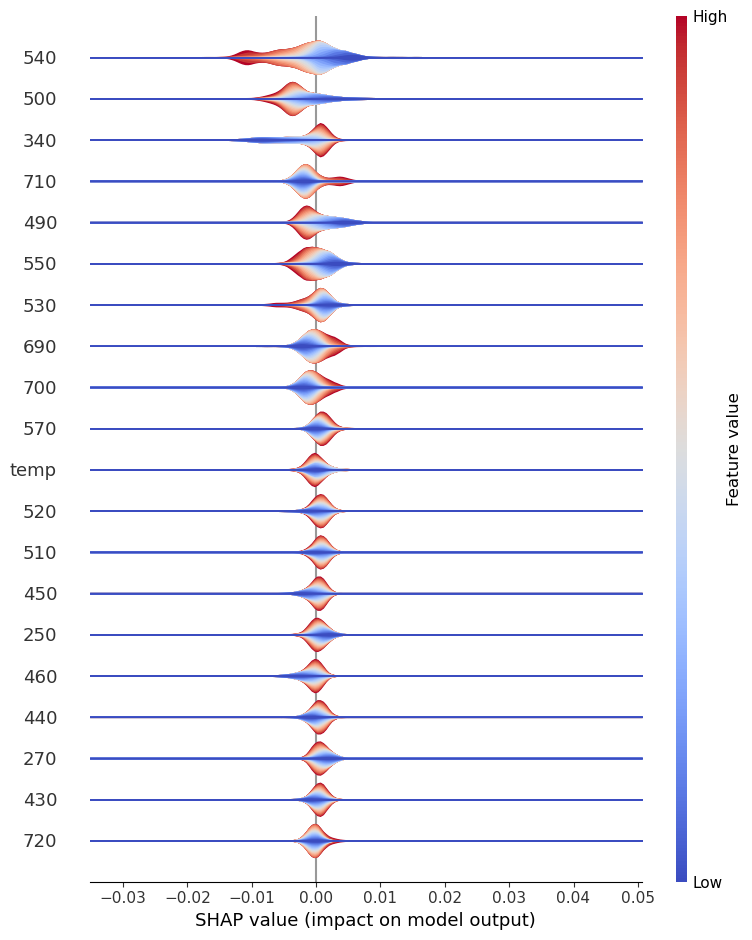

In [ ]:
plot_shap(shap_vasl, X=X, target_name='dinoflagellate', 
          input_types='full_verification')

In [9]:
for k, v in model_nums.items():
    compute_and_plot_shaps(
        target=k, model_num=v, show_n_features=6,
        xlabel='', title=full_names[k])

2025-03-20 16:04:03.290 | INFO     | __main__:compute_and_plot_shaps:11 - Saved figure as shap_rrs_env_dia.png
2025-03-20 16:04:15.565 | INFO     | __main__:compute_and_plot_shaps:11 - Saved figure as shap_rrs_env_chl.png
2025-03-20 16:04:22.830 | INFO     | __main__:compute_and_plot_shaps:11 - Saved figure as shap_rrs_env_cya.png
2025-03-20 16:04:35.433 | INFO     | __main__:compute_and_plot_shaps:11 - Saved figure as shap_rrs_env_coc.png
2025-03-20 16:04:41.657 | INFO     | __main__:compute_and_plot_shaps:11 - Saved figure as shap_rrs_env_din.png
2025-03-20 16:04:51.977 | INFO     | __main__:compute_and_plot_shaps:11 - Saved figure as shap_rrs_env_pha.png
2025-03-20 16:05:03.322 | INFO     | __main__:compute_and_plot_shaps:11 - Saved figure as shap_rrs_env_tot_cphyl.png


<Figure size 800x390 with 0 Axes>